In [1]:
import research_kit_bottom_trend_follow as rk
rk.pd.set_option("display.max_columns", 250)
rk.pd.set_option("display.max_rows", 250)
import warnings
warnings.filterwarnings('ignore')

tradingbot = rk.BottomTrendFollow(db_client=rk.mysql_client, exchange_client=rk.bitmex_exchange_client, is_backtest=True)

backtest_start_time = rk.datetime(2019,12,24,0,0)
backtest_end_time = rk.datetime(2020,1,7,0,0)

downloading BTC/USD data on bitmex
downloading 2020-01-06 22:52:30 ~ 2020-01-07 07:12:30 data
50.0% completed
downloading 2020-01-07 07:12:30 ~ 2020-01-07 13:20:00.553790 data
100.0% completed
Loading OHLCV data from bitmex_original_ohlcv_1min now...


# 11 generate naive transaction log and summary

I'll check the second best parameters with naive, non take any measure about lot and leverage.

In [6]:
## param timeframe=>30, bottom=>5, middle=>3, top=>1
## param timeframe=>30, bottom=>5, middle=>3, top=>1, inverse_trading
## Already created so commented out

# param timeframe=>30, bottom=>5, middle=>3, top=>1
#id_1 = rk.generate_transaction_log_by_param(tradingbot=tradingbot, timeframe_param=30, backtest_start_time=backtest_start_time,
#    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=1, inverse_trading=False,
#    close_position_on_do_nothing=True)
    
# param timeframe=>30, bottom=>5, middle=>3, top=>2
#id_2 = rk.generate_transaction_log_by_param(tradingbot=tradingbot, timeframe_param=30, backtest_start_time=backtest_start_time,
#    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=2, inverse_trading=False,
#    close_position_on_do_nothing=True)

# param timeframe=>30, bottom=>5, middle=>3, top=>1, inverse_trading
id_1_inv = rk.generate_transaction_log_by_param(tradingbot=tradingbot, timeframe_param=30, backtest_start_time=backtest_start_time,
    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=1, inverse_trading=True,
    random_forest_leverage_adjust=False, close_position_on_do_nothing=True)
    
# param timeframe=>30, bottom=>5, middle=>3, top=>2, inverse_trading
id_2_inv = rk.generate_transaction_log_by_param(tradingbot=tradingbot, timeframe_param=30, backtest_start_time=backtest_start_time,
    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=2, inverse_trading=True,
    random_forest_leverage_adjust=False, close_position_on_do_nothing=True, )

Loading OHLCV data from bitmex_original_ohlcv_1min now...
dataset size: 20032
bottom_trend_tick=>5 midle_trend_tick=>3 top_trend_tick=>1 time:0:00:01.237596
Loading OHLCV data from bitmex_original_ohlcv_1min now...
dataset size: 20032
bottom_trend_tick=>5 midle_trend_tick=>3 top_trend_tick=>2 time:0:00:01.259966


In [8]:
#print(id_1)
#print(id_2)
print(id_1_inv)
print(id_2_inv)

#normals = [id_1, id_2]
invs = [id_1_inv, id_2_inv]

4507
4508


In [9]:
rk.compare_summary_by_ids(invs)

                                              4507                 4508
backtest_summary_id                           4507                 4508
timeframe                                       30                   30
close_position_on_do_nothing                     1                    1
inverse_trading                                  1                    1
bottom_trend_tick                                5                    5
middle_trend_tick                                3                    3
top_trend_tick                                   1                    2
version                                     v1.0.0               v1.0.0
bot_name                       bottom_trend_follow  bottom_trend_follow
random_forest_leverage_adjust                    0                    0
                                                         4507                 4508
absolute_drawdown                                       -3.35                -6.85
account_currency                          

transaction log loading from summary_id:4507
transaction log loading from summary_id:4508


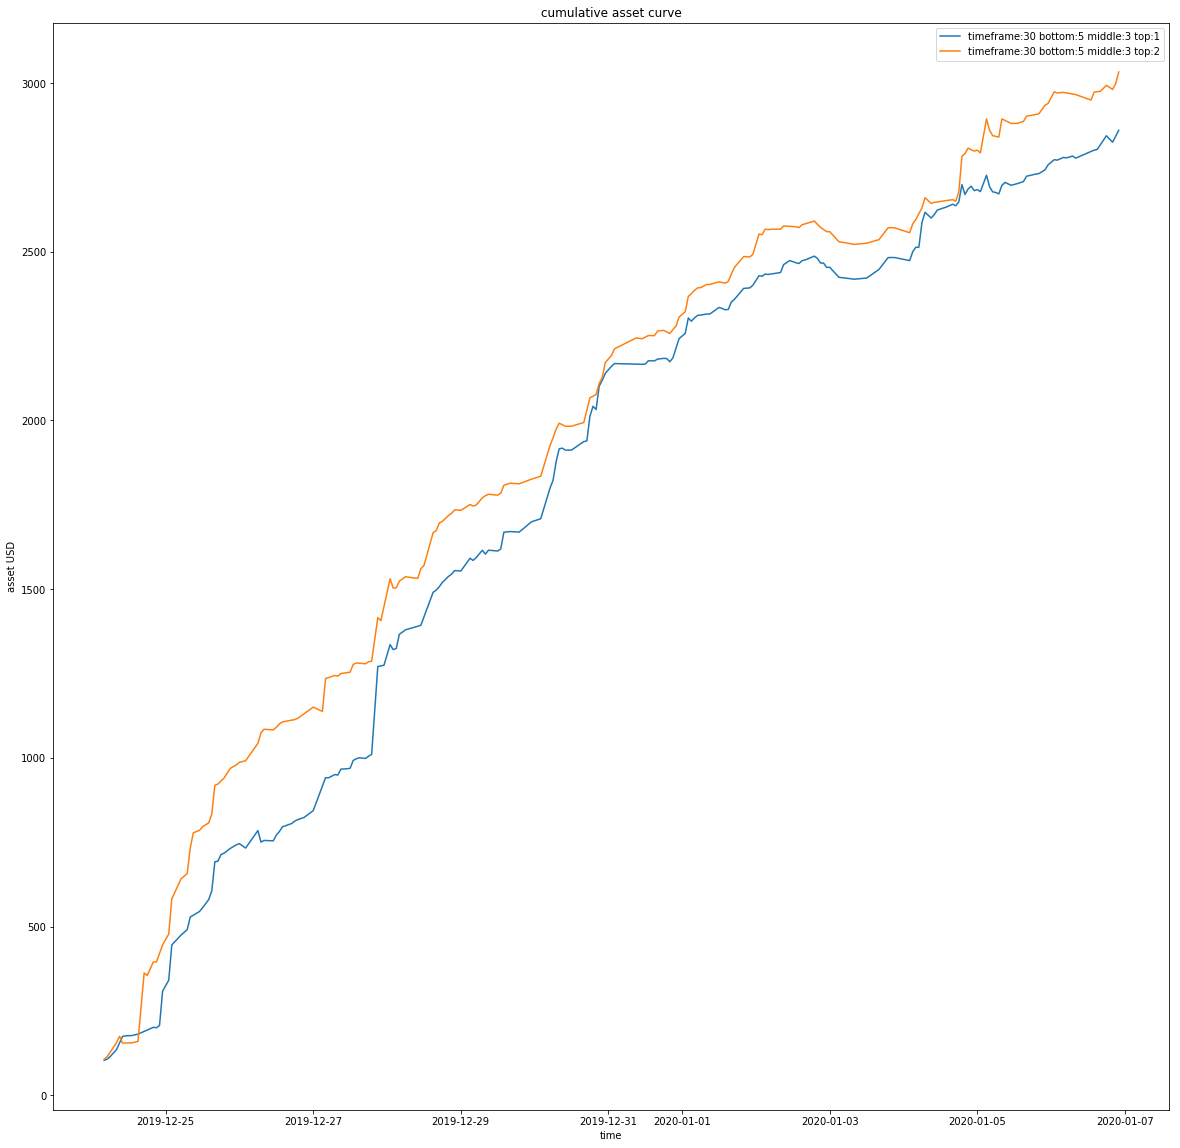

In [10]:
rk.generate_asset_curve_by_summary_ids(invs)

Loading OHLCV data from bitmex_original_ohlcv_1min now...


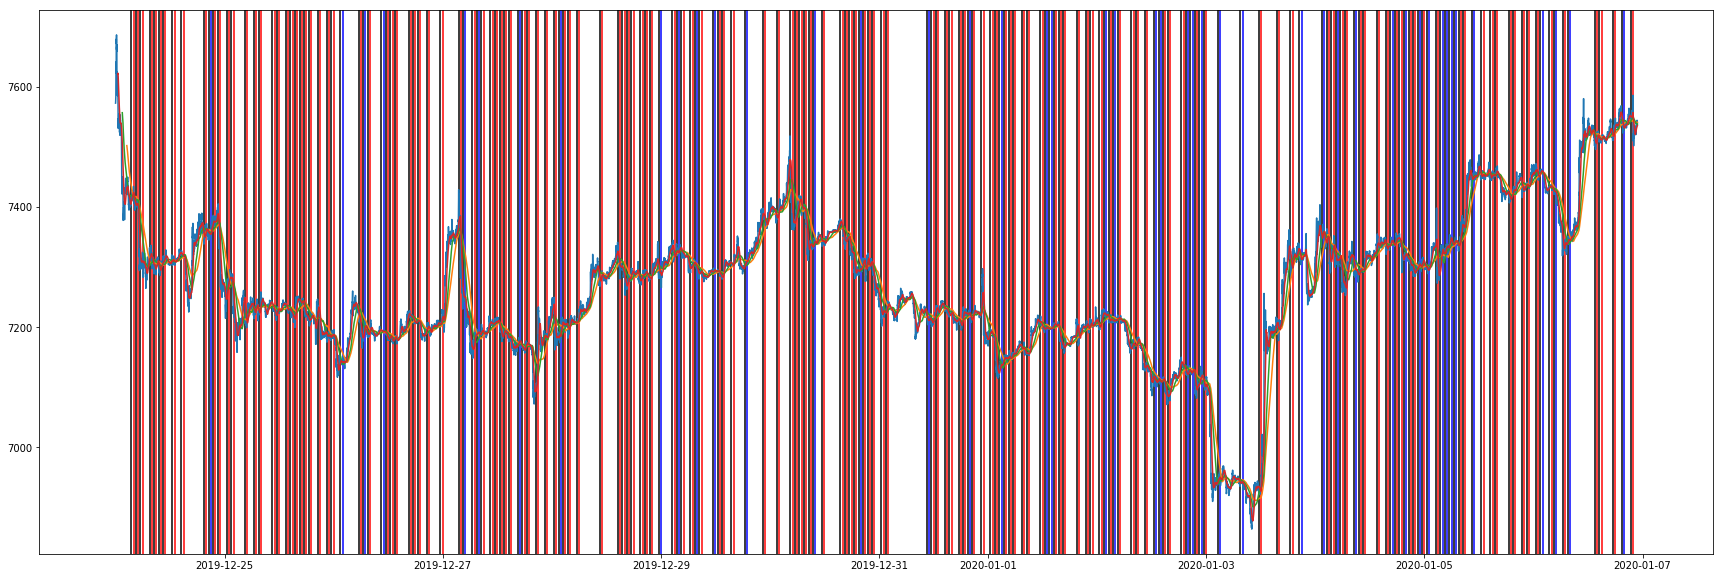

In [6]:
rk.generate_transaction_snapshot_by_summary_id(id_1_inv, backtest_start_time, backtest_end_time)

Loading OHLCV data from bitmex_original_ohlcv_1min now...


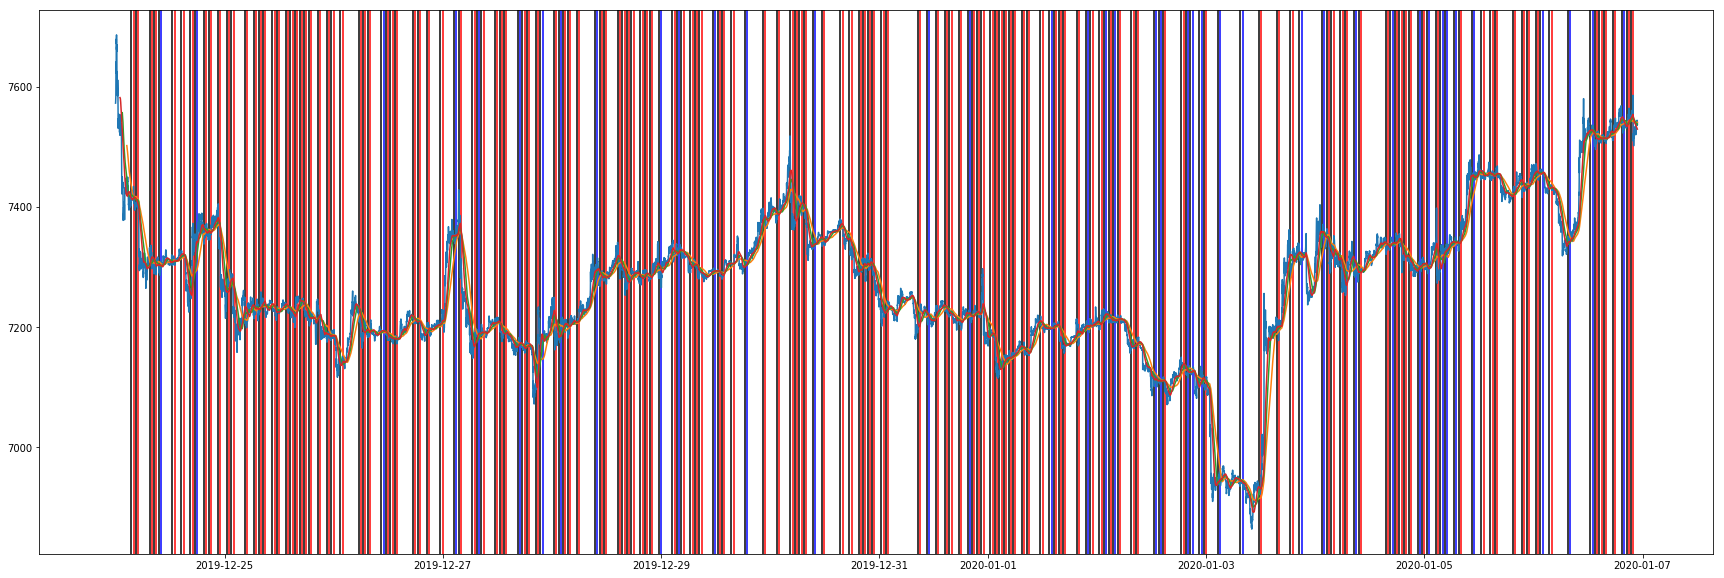

In [7]:
rk.generate_transaction_snapshot_by_summary_id(id_2_inv, backtest_start_time, backtest_end_time)

# 12 generate transaction log with RandomForest Binary Trend Predictor

If you use a normal trade and correspond to the MA trends, then bet 2x
 - Buy signal => try to buy, so if you get buy signal and the predictor said uptrend, then bet 2x
 - Sell signal => try to sell, so if you get sell signal and the predictor said downtrend, then bet 2x
If you use a inverse trade and contradict to the MA trends, then bet 2x
 - Buy signal => try to sell, so if you get buy signal and the predictor said downtrend, then bet 2x
 - Sell signal => try to buy, so if you get sell signal and the predictor said uptrend, then bet 2x

I'll compare the result between the naive one.

In [8]:
# param timeframe=>30, bottom=>5, middle=>3, top=>1, inverse_trading, random_forest_leverage

id_1_inv_randomforest = rk.generate_transaction_log_by_param(tradingbot=tradingbot, timeframe_param=30, backtest_start_time=backtest_start_time,
    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=1, inverse_trading=True,
    random_forest_leverage_adjust=True, close_position_on_do_nothing=True)

# param timeframe=>30, bottom=>5, middle=>3, top=>2, inverse_trading, random_forest_leverage
id_2_inv_randomforest = rk.generate_transaction_log_by_param(tradingbot=tradingbot, timeframe_param=30, backtest_start_time=backtest_start_time,
    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=2, inverse_trading=True,
    random_forest_leverage_adjust=True, close_position_on_do_nothing=True)

Loading OHLCV data from bitmex_original_ohlcv_1min now...
dataset size: 20032
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min n

Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV 

Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV 

Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV 

Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV 

In [9]:
rk.compare_summary_by_ids([id_1_inv, id_1_inv_randomforest])

                                              4497                 4499
backtest_summary_id                           4497                 4499
timeframe                                       30                   30
close_position_on_do_nothing                     1                    1
inverse_trading                                  1                    1
bottom_trend_tick                                5                    5
middle_trend_tick                                3                    3
top_trend_tick                                   1                    1
version                                     v1.0.0               v1.0.0
bot_name                       bottom_trend_follow  bottom_trend_follow
random_forest_leverage_adjust                    0                    1
                                                         4497                 4499
absolute_drawdown                                       -3.35                -3.35
account_currency                          

In [10]:
rk.compare_summary_by_ids([id_2_inv, id_2_inv_randomforest])

                                              4498                 4500
backtest_summary_id                           4498                 4500
timeframe                                       30                   30
close_position_on_do_nothing                     1                    1
inverse_trading                                  1                    1
bottom_trend_tick                                5                    5
middle_trend_tick                                3                    3
top_trend_tick                                   2                    2
version                                     v1.0.0               v1.0.0
bot_name                       bottom_trend_follow  bottom_trend_follow
random_forest_leverage_adjust                    0                    1
                                                         4498                 4500
absolute_drawdown                                       -3.35                -3.35
account_currency                          

transaction log loading from summary_id:4497
transaction log loading from summary_id:4499


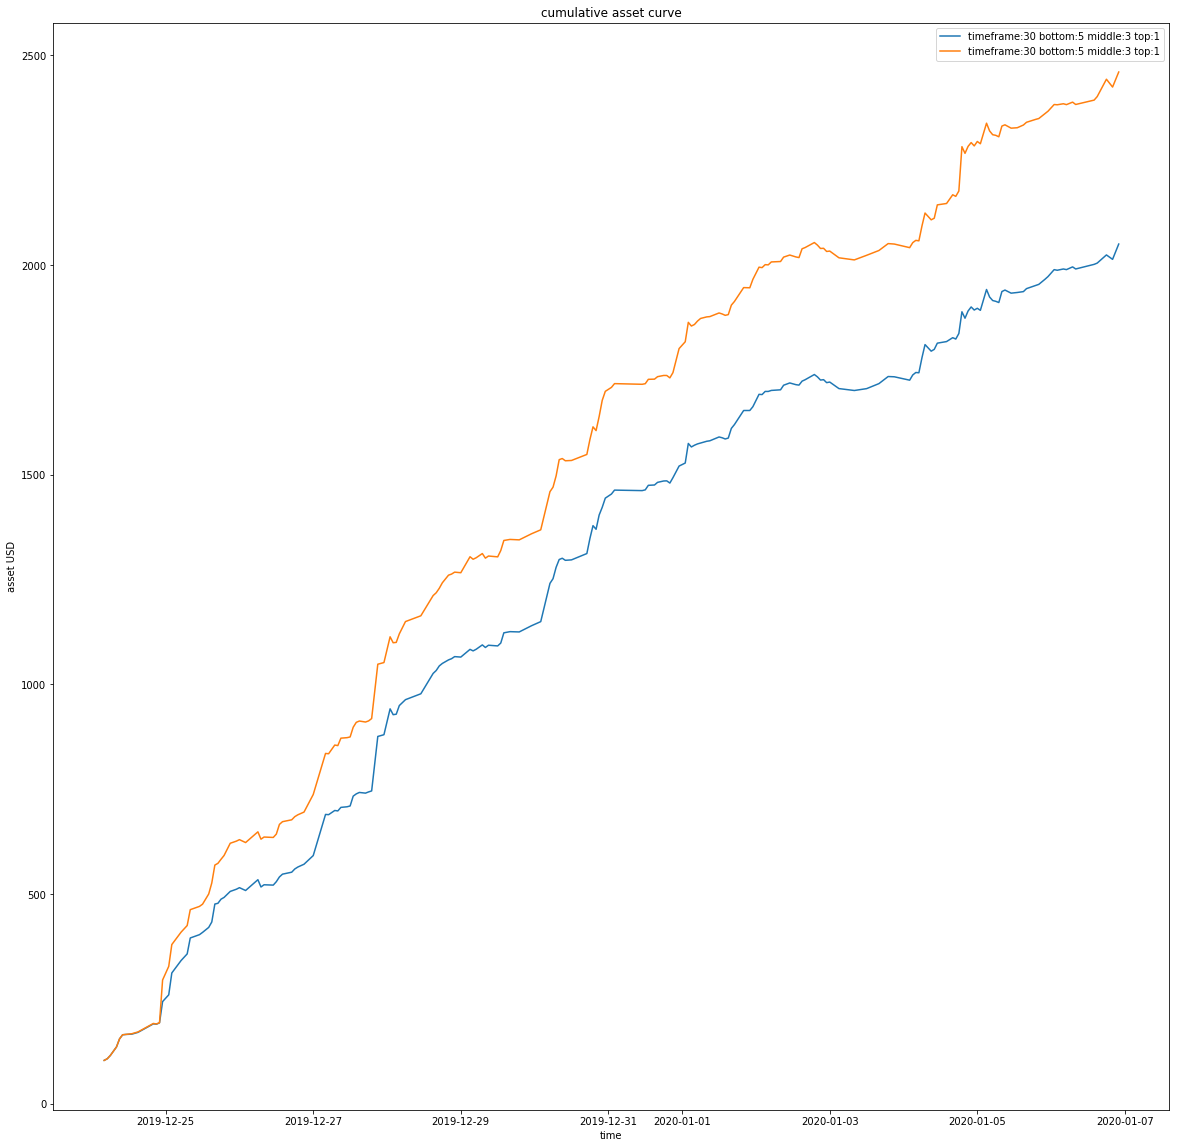

In [11]:
rk.generate_asset_curve_by_summary_ids([id_1_inv, id_1_inv_randomforest])

transaction log loading from summary_id:4498
transaction log loading from summary_id:4500


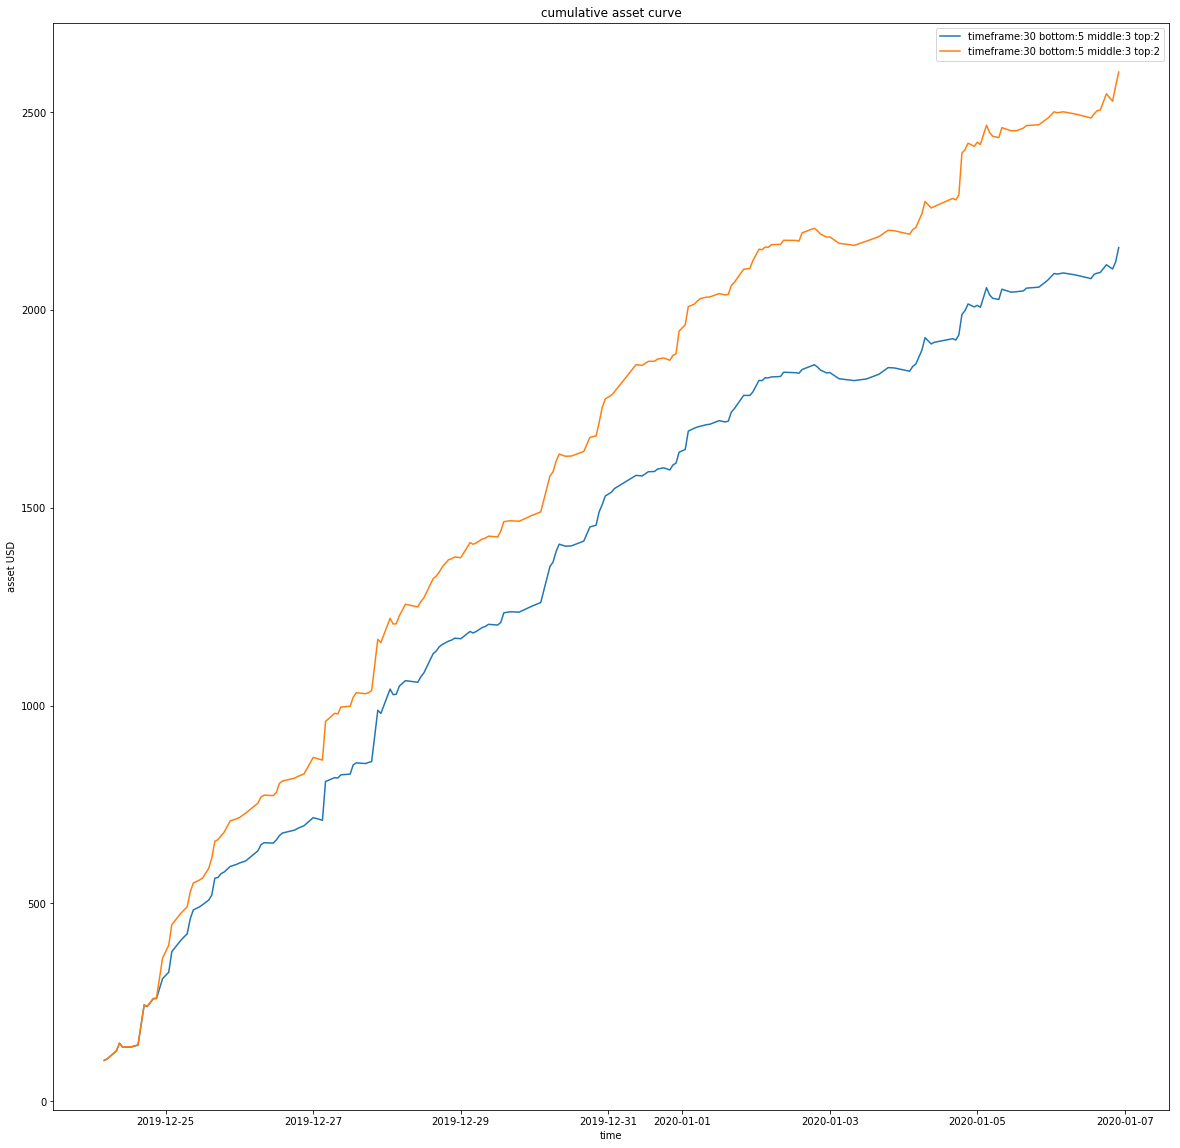

In [12]:
rk.generate_asset_curve_by_summary_ids([id_2_inv, id_2_inv_randomforest])

transaction log loading from summary_id:4499
transaction log loading from summary_id:4500


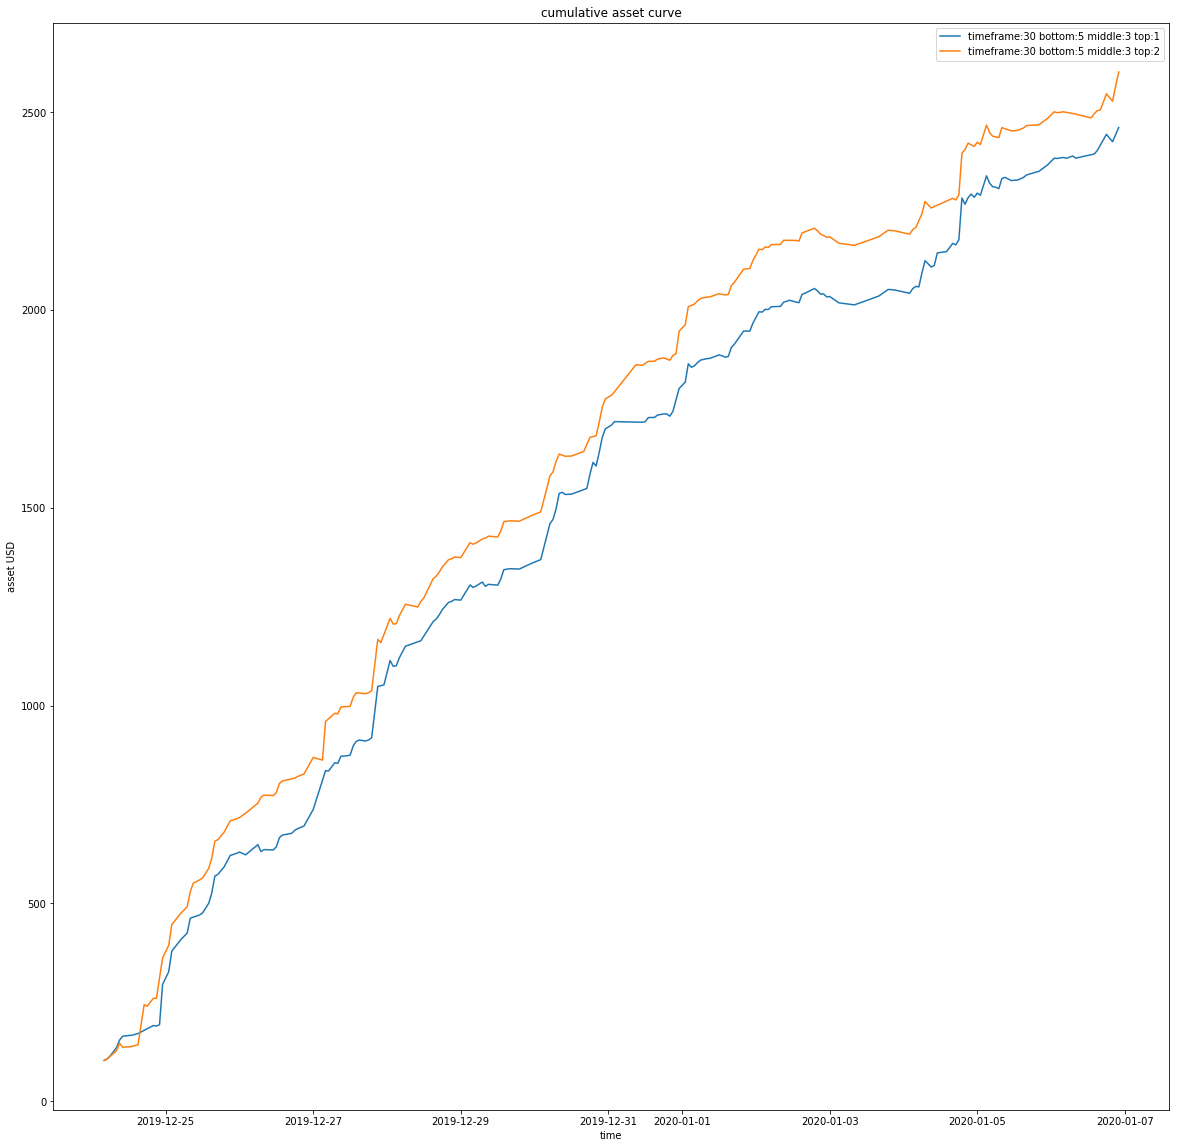

In [13]:
rk.generate_asset_curve_by_summary_ids([id_1_inv_randomforest, id_2_inv_randomforest])

In [2]:
# compare with random choice leverage from [1,2]
id_1_inv_randomleverage_for_compare = rk.generate_transaction_log_by_param(tradingbot=tradingbot, 
    timeframe_param=30, backtest_start_time=backtest_start_time,
    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=1, inverse_trading=True,
    random_forest_leverage_adjust=False, close_position_on_do_nothing=True, random_leverage_only_backtest=True)

id_2_inv_randomleverage_for_compare = rk.generate_transaction_log_by_param(tradingbot=tradingbot, 
    timeframe_param=30, backtest_start_time=backtest_start_time,
    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=2, inverse_trading=True,
    random_forest_leverage_adjust=False, close_position_on_do_nothing=True, random_leverage_only_backtest=True)

Loading OHLCV data from bitmex_original_ohlcv_1min now...
dataset size: 20032
bottom_trend_tick=>5 midle_trend_tick=>3 top_trend_tick=>1 time:0:00:01.191148
Loading OHLCV data from bitmex_original_ohlcv_1min now...
dataset size: 20032
bottom_trend_tick=>5 midle_trend_tick=>3 top_trend_tick=>2 time:0:00:01.149320


In [4]:
rk.compare_summary_by_ids([id_1_inv_randomleverage_for_compare, id_2_inv_randomleverage_for_compare])

                                              4505                 4506
backtest_summary_id                           4505                 4506
timeframe                                       30                   30
close_position_on_do_nothing                     1                    1
inverse_trading                                  1                    1
bottom_trend_tick                                5                    5
middle_trend_tick                                3                    3
top_trend_tick                                   1                    2
version                                     v1.0.0               v1.0.0
bot_name                       bottom_trend_follow  bottom_trend_follow
random_forest_leverage_adjust                    0                    0
                                                         4505                 4506
absolute_drawdown                                       -6.85                -6.85
account_currency                          

transaction log loading from summary_id:4497
transaction log loading from summary_id:4499
transaction log loading from summary_id:4505


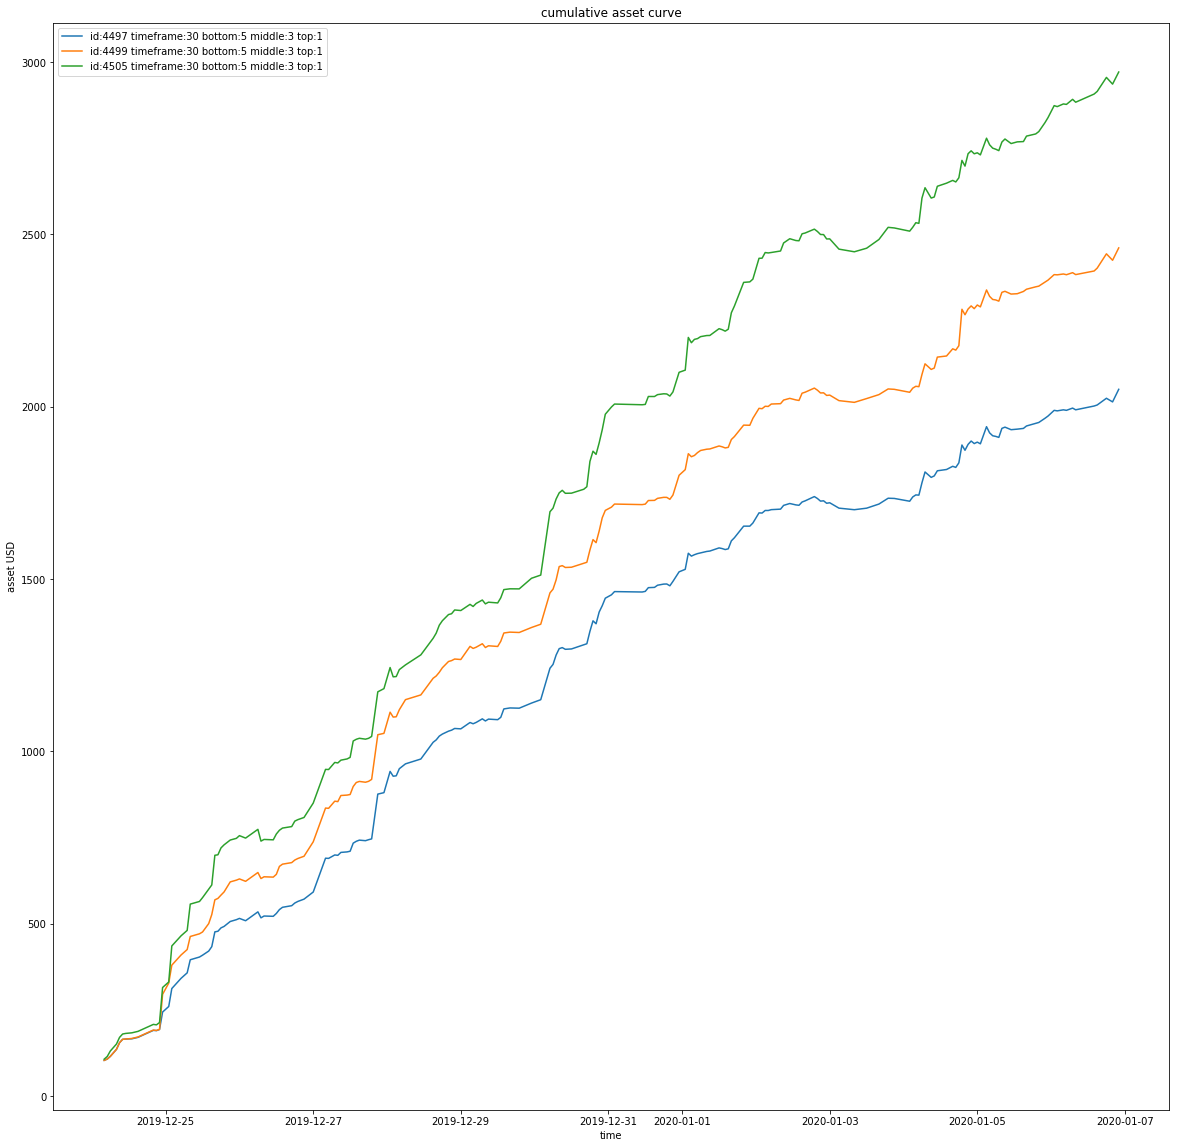

In [3]:
rk.generate_asset_curve_by_summary_ids([4497, 4499, 4505])

In [2]:
# param timeframe=>30, bottom=>5, middle=>3, top=>1, inverse_trading, random_forest_leverage

id_3_inv_randomforest = rk.generate_transaction_log_by_param(tradingbot=tradingbot, timeframe_param=30, backtest_start_time=backtest_start_time,
    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=1, inverse_trading=True,
    random_forest_leverage_adjust=True, close_position_on_do_nothing=True, random_leverage_only_backtest=False)

# param timeframe=>30, bottom=>5, middle=>3, top=>2, inverse_trading, random_forest_leverage
#id_4_inv_randomforest = rk.generate_transaction_log_by_param(tradingbot=tradingbot, timeframe_param=30, backtest_start_time=backtest_start_time,
#    backtest_end_time=backtest_end_time, bottom_trend_tick=5, middle_trend_tick=3, top_trend_tick=2, inverse_trading=True,
#    random_forest_leverage_adjust=True, close_position_on_do_nothing=True, random_leverage_only_backtest=False)

Loading OHLCV data from bitmex_original_ohlcv_1min now...
dataset size: 20032
Pandas(Index=Timestamp('2019-12-24 03:30:00'), ad=2138870000.0, asset_name='BTC/USD', atr=2.95944, close=7419.5, exchange_name='bitmex', high=7419.5, id=196105, low=7419.0, obv=-5025880000.0, open=7419.5, psar=7400.67, psar_trend='uptrend', roc=0.243194, rsi=64.8572, slowd=100.0, slowk=100.0, volume=428202.0, williams_r=0.0, ema_5=7415.166666666667, ema_5_diff=-0.16857341934323794, ema_5_trend='downtrend', ema_3=7415.625, ema_3_diff=0.2208175305520438, ema_3_trend='uptrend', ema_1=7419.5, ema_1_diff=0.33021093065570456, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-24 04:30:00'), ad=2140560000.0, asset_name='BTC/USD', atr=2.48958, close=7401.0, exchange_name='bitmex', high=7402.0, id=196165, low=7400.5, obv=-5033120000.0, open=7402.0, psar=7395.15, psar_trend='uptrend', roc=0.0270307, rsi=41.2516, slowd=29.7697, slowk=5.15

Pandas(Index=Timestamp('2019-12-24 16:30:00'), ad=2137070000.0, asset_name='BTC/USD', atr=3.3533, close=7263.0, exchange_name='bitmex', high=7263.0, id=196885, low=7262.5, obv=-5197410000.0, open=7262.5, psar=7257.81, psar_trend='uptrend', roc=0.0344329, rsi=59.1322, slowd=96.9017, slowk=97.4359, volume=280706.0, williams_r=-11.7647, ema_5=7282.916666666667, ema_5_diff=-0.10870187081639994, ema_5_trend='downtrend', ema_3=7263.5, ema_3_diff=-0.13079094100640187, ema_3_trend='downtrend', ema_1=7263.0, ema_1_diff=0.2547156822249759, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-24 17:30:00'), ad=2123880000.0, asset_name='BTC/USD', atr=6.2312, close=7355.0, exchange_name='bitmex', high=7355.0, id=196945, low=7346.5, obv=-5115630000.0, open=7347.0, psar=7324.76, psar_trend='uptrend', roc=0.272665, rsi=66.2487, slowd=100.0, slowk=100.0, volume=3501780.0, williams_r=0.0, ema_5=7310.916666666667, ema_5_diff

Pandas(Index=Timestamp('2019-12-25 05:30:00'), ad=2039070000.0, asset_name='BTC/USD', atr=3.19153, close=7229.5, exchange_name='bitmex', high=7230.0, id=197665, low=7229.5, obv=-5281950000.0, open=7230.0, psar=7233.31, psar_trend='downtrend', roc=-0.0691133, rsi=53.0934, slowd=77.5794, slowk=91.9048, volume=37795.0, williams_r=-56.0976, ema_5=7227.5, ema_5_diff=0.13144240747146316, ema_5_trend='uptrend', ema_3=7228.5, ema_3_diff=-0.015563394895206473, ema_3_trend='downtrend', ema_1=7229.5, ema_1_diff=0.23514765889757244, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-25 06:30:00'), ad=2037660000.0, asset_name='BTC/USD', atr=4.04303, close=7218.5, exchange_name='bitmex', high=7219.0, id=197725, low=7218.0, obv=-5285130000.0, open=7218.5, psar=7234.33, psar_trend='downtrend', roc=-0.193571, rsi=37.4351, slowd=18.9103, slowk=22.5, volume=79617.0, williams_r=-83.0986, ema_5=7226.916666666667, ema_5_diff=

Pandas(Index=Timestamp('2019-12-25 18:30:00'), ad=2030200000.0, asset_name='BTC/USD', atr=1.29772, close=7214.0, exchange_name='bitmex', high=7214.0, id=198445, low=7213.5, obv=-5296380000.0, open=7214.0, psar=7219.31, psar_trend='downtrend', roc=-0.00693049, rsi=38.7645, slowd=14.0212, slowk=9.52381, volume=31278.0, williams_r=-54.5455, ema_5=7227.833333333333, ema_5_diff=-0.0830124288053128, ema_5_trend='downtrend', ema_3=7220.125, ema_3_diff=-0.12118903758591437, ema_3_trend='downtrend', ema_1=7214.0, ema_1_diff=-0.09703354588300526, ema_1_trend='downtrend', signal='sell')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-25 19:30:00'), ad=2033520000.0, asset_name='BTC/USD', atr=1.4985, close=7215.5, exchange_name='bitmex', high=7216.0, id=198505, low=7215.5, obv=-5292140000.0, open=7216.0, psar=7222.85, psar_trend='downtrend', roc=-0.0830852, rsi=39.7436, slowd=1.48148, slowk=2.22222, volume=126102.0, williams_r=-100.0, ema_5=7219.41666666666

Pandas(Index=Timestamp('2019-12-26 07:30:00'), ad=2070160000.0, asset_name='BTC/USD', atr=2.13946, close=7189.0, exchange_name='bitmex', high=7189.0, id=199225, low=7183.0, obv=-5338810000.0, open=7183.0, psar=7183.0, psar_trend='uptrend', roc=-0.0556096, rsi=47.6706, slowd=18.8889, slowk=38.8889, volume=613856.0, williams_r=-40.0, ema_5=7193.5, ema_5_diff=-0.13553902828942796, ema_5_trend='downtrend', ema_3=7191.625, ema_3_diff=-0.029548259259903013, ema_3_trend='downtrend', ema_1=7189.0, ema_1_diff=-0.18778689664765613, ema_1_trend='downtrend', signal='sell')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-26 08:30:00'), ad=2072220000.0, asset_name='BTC/USD', atr=1.61229, close=7188.0, exchange_name='bitmex', high=7190.5, id=199285, low=7188.0, obv=-5337080000.0, open=7190.0, psar=7198.47, psar_trend='downtrend', roc=-0.125052, rsi=28.5672, slowd=22.2222, slowk=11.1111, volume=516496.0, williams_r=-100.0, ema_5=7191.416666666667, ema_5_diff=-

Pandas(Index=Timestamp('2019-12-26 20:30:00'), ad=2085870000.0, asset_name='BTC/USD', atr=1.95722, close=7206.5, exchange_name='bitmex', high=7207.0, id=200005, low=7206.5, obv=-5333700000.0, open=7207.0, psar=7191.1, psar_trend='uptrend', roc=0.243427, rsi=76.8748, slowd=87.7193, slowk=98.2456, volume=397104.0, williams_r=-2.7027, ema_5=7197.916666666667, ema_5_diff=0.06946454413892908, ema_5_trend='uptrend', ema_3=7192.0, ema_3_diff=0.10254449388209122, ema_3_trend='uptrend', ema_1=7206.5, ema_1_diff=0.4162908485395129, ema_1_trend='uptrend', signal='buy')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-26 21:30:00'), ad=2082140000.0, asset_name='BTC/USD', atr=1.35649, close=7192.0, exchange_name='bitmex', high=7192.0, id=200065, low=7191.5, obv=-5336280000.0, open=7191.5, psar=7186.22, psar_trend='uptrend', roc=0.0626087, rsi=51.9323, slowd=95.5556, slowk=96.6667, volume=32490.0, williams_r=0.0, ema_5=7190.75, ema_5_diff=-0.05099143575658965

Pandas(Index=Timestamp('2019-12-27 10:30:00'), ad=2090160000.0, asset_name='BTC/USD', atr=1.11728, close=7209.5, exchange_name='bitmex', high=7209.5, id=200845, low=7209.0, obv=-5298440000.0, open=7209.5, psar=7216.16, psar_trend='downtrend', roc=0.0, rsi=61.3801, slowd=100.0, slowk=100.0, volume=204797.0, williams_r=0.0, ema_5=7199.416666666667, ema_5_diff=0.07639507830495526, ema_5_trend='uptrend', ema_3=7201.5, ema_3_diff=0.10588071929459139, ema_3_trend='uptrend', ema_1=7209.5, ema_1_diff=0.15951175532283793, ema_1_trend='uptrend', signal='buy')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-27 11:30:00'), ad=2089870000.0, asset_name='BTC/USD', atr=1.31037, close=7214.0, exchange_name='bitmex', high=7214.5, id=200905, low=7214.0, obv=-5297760000.0, open=7214.0, psar=7203.25, psar_trend='uptrend', roc=0.16662, rsi=77.9923, slowd=96.6667, slowk=93.3333, volume=569521.0, williams_r=-3.84615, ema_5=7205.25, ema_5_diff=0.07055040884539787, ema_

Pandas(Index=Timestamp('2019-12-27 23:30:00'), ad=2097910000.0, asset_name='BTC/USD', atr=3.50244, close=7203.0, exchange_name='bitmex', high=7207.0, id=201625, low=7203.0, obv=-5230820000.0, open=7206.5, psar=7217.28, psar_trend='downtrend', roc=-0.131716, rsi=52.3326, slowd=24.5614, slowk=-9.10442e-12, volume=930948.0, williams_r=-80.5556, ema_5=7186.666666666667, ema_5_diff=-0.010435992578849721, ema_5_trend='downtrend', ema_3=7194.125, ema_3_diff=0.16854030198252046, ema_3_trend='uptrend', ema_1=7203.0, ema_1_diff=0.2846036373733167, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-28 00:30:00'), ad=2110750000.0, asset_name='BTC/USD', atr=4.83605, close=7247.5, exchange_name='bitmex', high=7247.5, id=201685, low=7245.5, obv=-5201890000.0, open=7246.0, psar=7222.0, psar_trend='uptrend', roc=0.0897666, rsi=60.7216, slowd=97.2222, slowk=100.0, volume=1151300.0, williams_r=0.0, ema_5=7214.583333333333,

Pandas(Index=Timestamp('2019-12-28 12:30:00'), ad=2146580000.0, asset_name='BTC/USD', atr=1.15232, close=7288.5, exchange_name='bitmex', high=7288.5, id=202405, low=7288.0, obv=-5205700000.0, open=7288.0, psar=7291.76, psar_trend='downtrend', roc=-0.0205761, rsi=54.0514, slowd=2.77778, slowk=8.33333, volume=47100.0, williams_r=-80.0, ema_5=7282.833333333333, ema_5_diff=0.010298189807080579, ema_5_trend='uptrend', ema_3=7283.875, ema_3_diff=0.05148358531688147, ema_3_trend='uptrend', ema_1=7288.5, ema_1_diff=0.20580366330520683, ema_1_trend='uptrend', signal='buy')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-28 13:30:00'), ad=2153850000.0, asset_name='BTC/USD', atr=1.59121, close=7299.5, exchange_name='bitmex', high=7300.5, id=202465, low=7299.5, obv=-5197900000.0, open=7300.0, psar=7309.64, psar_trend='downtrend', roc=-0.109477, rsi=39.9228, slowd=-8.78231e-12, slowk=-9.12337e-12, volume=694597.0, williams_r=-100.0, ema_5=7290.583333333333,

Pandas(Index=Timestamp('2019-12-29 01:30:00'), ad=2198950000.0, asset_name='BTC/USD', atr=1.06187, close=7305.0, exchange_name='bitmex', high=7305.0, id=203185, low=7304.5, obv=-5217200000.0, open=7305.0, psar=7310.03, psar_trend='downtrend', roc=-0.0205297, rsi=43.4894, slowd=23.1481, slowk=27.7778, volume=229521.0, williams_r=-83.3333, ema_5=7298.833333333333, ema_5_diff=-0.009133879843814809, ema_5_trend='downtrend', ema_3=7305.125, ema_3_diff=0.059889461165962256, ema_3_trend='uptrend', ema_1=7305.0, ema_1_diff=-0.013689253935660506, ema_1_trend='downtrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-29 02:30:00'), ad=2216200000.0, asset_name='BTC/USD', atr=1.39458, close=7338.0, exchange_name='bitmex', high=7338.0, id=203245, low=7336.0, obv=-5202640000.0, open=7336.5, psar=7332.48, psar_trend='uptrend', roc=0.0886585, rsi=69.7755, slowd=88.8889, slowk=100.0, volume=965662.0, williams_r=0.0, ema_5=7319.83333333333

Pandas(Index=Timestamp('2019-12-29 15:30:00'), ad=2217210000.0, asset_name='BTC/USD', atr=0.694041, close=7306.5, exchange_name='bitmex', high=7307.5, id=204025, low=7306.0, obv=-5228660000.0, open=7307.0, psar=7308.79, psar_trend='downtrend', roc=-0.0136846, rsi=42.6916, slowd=59.2593, slowk=44.4444, volume=642311.0, williams_r=-80.0, ema_5=7301.916666666667, ema_5_diff=0.039943850358928175, ema_5_trend='uptrend', ema_3=7305.875, ema_3_diff=-0.006843807209950895, ema_3_trend='downtrend', ema_1=7306.5, ema_1_diff=-0.020529665366454525, ema_1_trend='downtrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-29 16:30:00'), ad=2227220000.0, asset_name='BTC/USD', atr=1.02225, close=7316.0, exchange_name='bitmex', high=7316.5, id=204085, low=7316.0, obv=-5218270000.0, open=7316.0, psar=7321.39, psar_trend='downtrend', roc=-0.00683387, rsi=58.2986, slowd=5.55556, slowk=-9.21574e-12, volume=62560.0, williams_r=-100.0, ema_5=7308.

Pandas(Index=Timestamp('2019-12-30 04:30:00'), ad=2248140000.0, asset_name='BTC/USD', atr=10.7549, close=7471.5, exchange_name='bitmex', high=7479.0, id=204805, low=7464.0, obv=-5116970000.0, open=7464.0, psar=7518.74, psar_trend='downtrend', roc=-0.293588, rsi=45.0533, slowd=15.9232, slowk=14.4828, volume=5999000.0, williams_r=-73.1034, ema_5=7438.0, ema_5_diff=0.212870843416685, ema_5_trend='uptrend', ema_3=7452.75, ema_3_diff=0.22642648686726374, ema_3_trend='uptrend', ema_1=7471.5, ema_1_diff=0.23422338218563876, ema_1_trend='uptrend', signal='buy')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-30 05:30:00'), ad=2226400000.0, asset_name='BTC/USD', atr=3.97733, close=7374.5, exchange_name='bitmex', high=7375.0, id=204865, low=7374.5, obv=-5195570000.0, open=7374.5, psar=7361.46, psar_trend='uptrend', roc=-0.0609839, rsi=47.6571, slowd=92.4555, slowk=95.7792, volume=465898.0, williams_r=-25.0, ema_5=7411.166666666667, ema_5_diff=-0.11469179

Pandas(Index=Timestamp('2019-12-30 18:30:00'), ad=2223230000.0, asset_name='BTC/USD', atr=2.43594, close=7318.0, exchange_name='bitmex', high=7318.0, id=205645, low=7314.0, obv=-5265890000.0, open=7317.0, psar=7327.02, psar_trend='downtrend', roc=-0.0204932, rsi=40.4647, slowd=29.7907, slowk=11.5942, volume=2222220.0, williams_r=-65.2174, ema_5=7330.166666666667, ema_5_diff=-0.08867465496464381, ema_5_trend='downtrend', ema_3=7324.5, ema_3_diff=-0.06826404532732609, ema_3_trend='downtrend', ema_1=7318.0, ema_1_diff=0.08198961464881116, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-30 19:30:00'), ad=2211680000.0, asset_name='BTC/USD', atr=2.29169, close=7290.0, exchange_name='bitmex', high=7292.0, id=205705, low=7289.5, obv=-5283470000.0, open=7292.0, psar=7295.13, psar_trend='downtrend', roc=-0.0342818, rsi=42.0751, slowd=71.3726, slowk=44.2297, volume=860458.0, williams_r=-68.0, ema_5=7307.58333333

Pandas(Index=Timestamp('2019-12-31 08:30:00'), ad=2223680000.0, asset_name='BTC/USD', atr=2.42649, close=7191.0, exchange_name='bitmex', high=7191.0, id=206485, low=7190.5, obv=-5320260000.0, open=7191.0, psar=7181.3, psar_trend='uptrend', roc=-0.173527, rsi=37.4737, slowd=78.9474, slowk=100.0, volume=203414.0, williams_r=-92.8571, ema_5=7218.083333333333, ema_5_diff=-0.10852373090733607, ema_5_trend='downtrend', ema_3=7200.75, ema_3_diff=-0.18921640106933305, ema_3_trend='downtrend', ema_1=7191.0, ema_1_diff=0.15296898901404535, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-31 09:30:00'), ad=2232680000.0, asset_name='BTC/USD', atr=1.61201, close=7222.5, exchange_name='bitmex', high=7223.0, id=206545, low=7222.5, obv=-5312680000.0, open=7223.0, psar=7228.95, psar_trend='downtrend', roc=-0.124456, rsi=40.2072, slowd=25.5556, slowk=33.3333, volume=65677.0, williams_r=-100.0, ema_5=7213.916666666667, e

Pandas(Index=Timestamp('2019-12-31 21:30:00'), ad=2233460000.0, asset_name='BTC/USD', atr=1.49387, close=7224.0, exchange_name='bitmex', high=7224.5, id=207265, low=7224.0, obv=-5320330000.0, open=7224.0, psar=7225.46, psar_trend='downtrend', roc=0.0207684, rsi=50.7254, slowd=95.8333, slowk=91.6667, volume=535261.0, williams_r=-22.2222, ema_5=7222.333333333333, ema_5_diff=-0.014999769234327867, ema_5_trend='downtrend', ema_3=7222.75, ema_3_diff=-0.013845142085770656, ema_3_trend='downtrend', ema_1=7224.0, ema_1_diff=-0.06921373200442968, ema_1_trend='downtrend', signal='sell')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2019-12-31 22:30:00'), ad=2236520000.0, asset_name='BTC/USD', atr=1.07649, close=7230.0, exchange_name='bitmex', high=7230.0, id=207325, low=7229.0, obv=-5318600000.0, open=7229.0, psar=7224.44, psar_trend='uptrend', roc=0.103842, rsi=81.1189, slowd=74.7619, slowk=66.6667, volume=1403660.0, williams_r=0.0, ema_5=7224.0, ema_5_diff=0

Pandas(Index=Timestamp('2020-01-01 10:30:00'), ad=2254750000.0, asset_name='BTC/USD', atr=2.54985, close=7209.0, exchange_name='bitmex', high=7209.0, id=208045, low=7206.5, obv=-5324640000.0, open=7206.5, psar=7201.2, psar_trend='uptrend', roc=0.138908, rsi=66.6294, slowd=70.6114, slowk=54.6563, volume=1034170.0, williams_r=-25.0, ema_5=7186.666666666667, ema_5_diff=0.15074211502783774, ema_5_trend='uptrend', ema_3=7202.625, ema_3_diff=0.23602506030787387, ema_3_trend='uptrend', ema_1=7209.0, ema_1_diff=0.16645859342488556, ema_1_trend='uptrend', signal='buy')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-01 11:30:00'), ad=2255070000.0, asset_name='BTC/USD', atr=1.18151, close=7212.5, exchange_name='bitmex', high=7212.5, id=208105, low=7211.5, obv=-5315290000.0, open=7212.0, psar=7204.16, psar_trend='uptrend', roc=0.0277373, rsi=63.5822, slowd=66.6667, slowk=100.0, volume=241021.0, williams_r=0.0, ema_5=7207.666666666667, ema_5_diff=0.1213985

Pandas(Index=Timestamp('2020-01-02 00:30:00'), ad=2229920000.0, asset_name='BTC/USD', atr=1.17346, close=7196.0, exchange_name='bitmex', high=7196.5, id=208885, low=7196.0, obv=-5331510000.0, open=7196.0, psar=7204.88, psar_trend='downtrend', roc=-0.0416725, rsi=24.5334, slowd=40.7407, slowk=33.3333, volume=170390.0, williams_r=-100.0, ema_5=7203.833333333333, ema_5_diff=-0.04511486939823705, ema_5_trend='downtrend', ema_3=7202.625, ema_3_diff=-0.0711546137692855, ema_3_trend='downtrend', ema_1=7196.0, ema_1_diff=-0.22234574763757642, ema_1_trend='downtrend', signal='sell')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-02 01:30:00'), ad=2238120000.0, asset_name='BTC/USD', atr=2.38386, close=7222.5, exchange_name='bitmex', high=7229.5, id=208945, low=7222.5, obv=-5323910000.0, open=7229.5, psar=7230.5, psar_trend='downtrend', roc=-0.0138437, rsi=48.113, slowd=71.6739, slowk=56.6667, volume=2414410.0, williams_r=-100.0, ema_5=7214.583333333333,

Pandas(Index=Timestamp('2020-01-02 13:30:00'), ad=2221960000.0, asset_name='BTC/USD', atr=1.807, close=7110.0, exchange_name='bitmex', high=7110.0, id=209665, low=7107.0, obv=-5358950000.0, open=7107.5, psar=7116.21, psar_trend='downtrend', roc=-0.112391, rsi=46.9621, slowd=13.9556, slowk=33.4199, volume=390230.0, williams_r=-72.7273, ema_5=7108.75, ema_5_diff=-0.05509641873278664, ema_5_trend='downtrend', ema_3=7108.875, ema_3_diff=0.07385134778709712, ema_3_trend='uptrend', ema_1=7110.0, ema_1_diff=0.02109704641350211, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-02 14:30:00'), ad=2228460000.0, asset_name='BTC/USD', atr=0.825566, close=7115.5, exchange_name='bitmex', high=7115.5, id=209725, low=7115.0, obv=-5355150000.0, open=7115.5, psar=7111.63, psar_trend='uptrend', roc=0.0703185, rsi=79.6827, slowd=100.0, slowk=100.0, volume=168419.0, williams_r=0.0, ema_5=7110.833333333333, ema_5_diff=0.0750

Pandas(Index=Timestamp('2020-01-03 02:30:00'), ad=2236880000.0, asset_name='BTC/USD', atr=2.5664, close=6937.5, exchange_name='bitmex', high=6941.0, id=210445, low=6937.5, obv=-5510540000.0, open=6940.5, psar=6950.0, psar_trend='downtrend', roc=-0.115182, rsi=40.0707, slowd=24.4444, slowk=-9.4739e-12, volume=803040.0, williams_r=-100.0, ema_5=6971.916666666667, ema_5_diff=-0.3848774249070633, ema_5_trend='downtrend', ema_3=6935.375, ema_3_diff=-0.19825892615756177, ema_3_trend='downtrend', ema_1=6937.5, ema_1_diff=0.0936936936936937, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-03 03:30:00'), ad=2236960000.0, asset_name='BTC/USD', atr=2.31543, close=6949.0, exchange_name='bitmex', high=6949.0, id=210505, low=6945.0, obv=-5501000000.0, open=6945.0, psar=6957.87, psar_trend='downtrend', roc=0.0143926, rsi=52.8208, slowd=22.2222, slowk=48.7179, volume=811046.0, williams_r=-43.4783, ema_5=6942.08333333

Pandas(Index=Timestamp('2020-01-03 15:30:00'), ad=2322940000.0, asset_name='BTC/USD', atr=3.24006, close=7209.5, exchange_name='bitmex', high=7209.5, id=211225, low=7208.5, obv=-5479630000.0, open=7209.0, psar=7205.15, psar_trend='uptrend', roc=-0.0138687, rsi=57.0804, slowd=16.6256, slowk=19.0731, volume=276806.0, williams_r=-40.0, ema_5=7194.833333333333, ema_5_diff=0.009265908406486976, ema_5_trend='uptrend', ema_3=7201.375, ema_3_diff=0.08331742202010033, ema_3_trend='uptrend', ema_1=7209.5, ema_1_diff=0.1456411679034607, ema_1_trend='uptrend', signal='buy')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-03 16:30:00'), ad=2329100000.0, asset_name='BTC/USD', atr=1.85003, close=7206.5, exchange_name='bitmex', high=7206.5, id=211285, low=7206.0, obv=-5471800000.0, open=7206.5, psar=7209.04, psar_trend='downtrend', roc=-0.0416118, rsi=57.4743, slowd=90.1235, slowk=100.0, volume=203131.0, williams_r=-36.8421, ema_5=7200.666666666667, ema_5_diff

Pandas(Index=Timestamp('2020-01-04 05:30:00'), ad=2291390000.0, asset_name='BTC/USD', atr=1.74857, close=7318.0, exchange_name='bitmex', high=7318.5, id=212065, low=7318.0, obv=-5345070000.0, open=7318.5, psar=7311.42, psar_trend='uptrend', roc=-0.0751007, rsi=51.4417, slowd=7.95455, slowk=8.33333, volume=89880.0, williams_r=-100.0, ema_5=7319.583333333333, ema_5_diff=-0.015938976490013818, ema_5_trend='downtrend', ema_3=7314.5, ema_3_diff=-0.034178686171303575, ema_3_trend='downtrend', ema_1=7318.0, ema_1_diff=0.08198961464881116, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-04 06:30:00'), ad=2272880000.0, asset_name='BTC/USD', atr=5.15828, close=7259.5, exchange_name='bitmex', high=7260.0, id=212125, low=7258.5, obv=-5382780000.0, open=7258.5, psar=7280.18, psar_trend='downtrend', roc=-0.144429, rsi=36.2478, slowd=12.2015, slowk=25.0398, volume=721087.0, williams_r=-71.6418, ema_5=7289.75, ema_5_

Pandas(Index=Timestamp('2020-01-04 19:30:00'), ad=2283360000.0, asset_name='BTC/USD', atr=2.38833, close=7311.5, exchange_name='bitmex', high=7312.5, id=212905, low=7311.5, obv=-5375690000.0, open=7312.0, psar=7319.52, psar_trend='downtrend', roc=-0.0683387, rsi=40.343, slowd=1.23457, slowk=-9.77115e-12, volume=1162670.0, williams_r=-100.0, ema_5=7327.75, ema_5_diff=-0.03866580237225656, ema_5_trend='downtrend', ema_3=7319.625, ema_3_diff=-0.1007565278275868, ema_3_trend='downtrend', ema_1=7311.5, ema_1_diff=0.15044792450249606, ema_1_trend='uptrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-04 20:30:00'), ad=2285530000.0, asset_name='BTC/USD', atr=1.02656, close=7315.5, exchange_name='bitmex', high=7316.0, id=212965, low=7315.5, obv=-5375460000.0, open=7316.0, psar=7311.36, psar_trend='uptrend', roc=0.0205086, rsi=48.2201, slowd=82.2222, slowk=60.0, volume=60359.0, williams_r=-7.69231, ema_5=7320.333333333333, ema_5

Pandas(Index=Timestamp('2020-01-05 09:30:00'), ad=2371160000.0, asset_name='BTC/USD', atr=12.6631, close=7455.0, exchange_name='bitmex', high=7455.0, id=213745, low=7450.0, obv=-5226360000.0, open=7452.0, psar=7462.26, psar_trend='downtrend', roc=0.36349, rsi=65.9088, slowd=45.0494, slowk=63.2576, volume=4063170.0, williams_r=-12.1622, ema_5=7390.583333333333, ema_5_diff=0.44651414525240457, ema_5_trend='uptrend', ema_3=7415.125, ema_3_diff=0.613610694357816, ema_3_trend='uptrend', ema_1=7455.0, ema_1_diff=1.113346747149564, ema_1_trend='uptrend', signal='buy')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-05 10:30:00'), ad=2363870000.0, asset_name='BTC/USD', atr=4.52576, close=7446.0, exchange_name='bitmex', high=7447.5, id=213805, low=7446.0, obv=-5243840000.0, open=7447.0, psar=7426.97, psar_trend='uptrend', roc=0.0873715, rsi=48.3737, slowd=84.9642, slowk=70.1307, volume=298249.0, williams_r=-18.0, ema_5=7427.583333333333, ema_5_diff=0.15

Pandas(Index=Timestamp('2020-01-05 22:30:00'), ad=2380550000.0, asset_name='BTC/USD', atr=1.24758, close=7440.0, exchange_name='bitmex', high=7440.0, id=214525, low=7439.5, obv=-5245750000.0, open=7439.5, psar=7433.39, psar_trend='uptrend', roc=0.0470651, rsi=64.4948, slowd=82.2222, slowk=86.6667, volume=284723.0, williams_r=0.0, ema_5=7435.0, ema_5_diff=0.0605245460659045, ema_5_trend='uptrend', ema_3=7431.5, ema_3_diff=0.016820292000269126, ema_3_trend='uptrend', ema_1=7440.0, ema_1_diff=0.12768817204301075, ema_1_trend='uptrend', signal='buy')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-05 23:30:00'), ad=2386020000.0, asset_name='BTC/USD', atr=1.74022, close=7454.0, exchange_name='bitmex', high=7455.5, id=214585, low=7454.0, obv=-5235730000.0, open=7455.5, psar=7445.66, psar_trend='uptrend', roc=0.141063, rsi=73.0053, slowd=82.3025, slowk=74.712, volume=577983.0, williams_r=-22.2222, ema_5=7437.416666666667, ema_5_diff=0.0739504084079373

Pandas(Index=Timestamp('2020-01-06 11:30:00'), ad=2431800000.0, asset_name='BTC/USD', atr=7.74631, close=7513.0, exchange_name='bitmex', high=7513.5, id=215305, low=7513.0, obv=-5224060000.0, open=7513.0, psar=7478.15, psar_trend='uptrend', roc=-0.126288, rsi=47.1129, slowd=58.2368, slowk=56.4394, volume=149698.0, williams_r=-87.8049, ema_5=7481.0, ema_5_diff=0.2127612173060683, ema_5_trend='uptrend', ema_3=7524.0, ema_3_diff=0.13456937799043062, ema_3_trend='uptrend', ema_1=7513.0, ema_1_diff=-0.6455477172900306, ema_1_trend='downtrend', signal='do_nothing')
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Pandas(Index=Timestamp('2020-01-06 12:30:00'), ad=2436470000.0, asset_name='BTC/USD', atr=2.70129, close=7520.0, exchange_name='bitmex', high=7520.0, id=215365, low=7519.5, obv=-5210660000.0, open=7519.5, psar=7525.01, psar_trend='downtrend', roc=-0.00664849, rsi=39.9757, slowd=58.3774, slowk=32.2751, volume=356251.0, williams_r=-90.9091, ema_5=7527.75, ema_5_diff=0.1605171

In [3]:
print(id_3_inv_randomforest)

4514


transaction log loading from summary_id:4497
transaction log loading from summary_id:4499
transaction log loading from summary_id:4505
transaction log loading from summary_id:4514


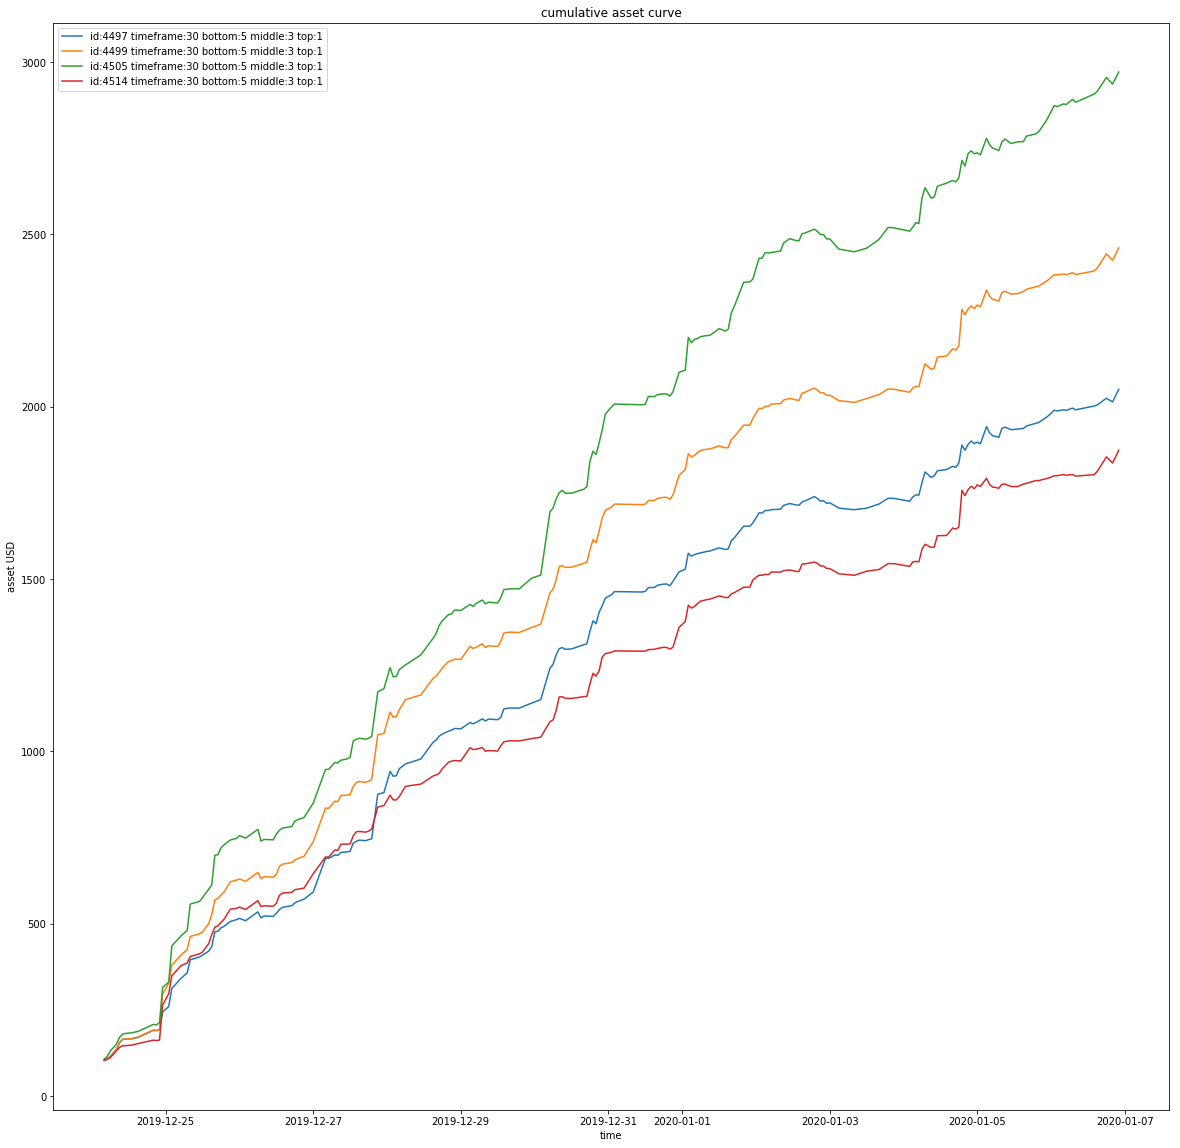

In [5]:
rk.generate_asset_curve_by_summary_ids([4497, 4499, 4505, 4514])

In [7]:
rk.compare_summary_by_ids([4499, id_3_inv_randomforest])

                                              4499                 4514
backtest_summary_id                           4499                 4514
timeframe                                       30                   30
close_position_on_do_nothing                     1                    1
inverse_trading                                  1                    1
bottom_trend_tick                                5                    5
middle_trend_tick                                3                    3
top_trend_tick                                   1                    1
version                                     v1.0.0               v1.0.0
bot_name                       bottom_trend_follow  bottom_trend_follow
random_forest_leverage_adjust                    1                    1
                                                         4499                 4514
absolute_drawdown                                       -3.35                -3.35
account_currency                          

# 13 generate transaction log with WinLose Predictor



If the classifier said it's likely to be win, then bet 2x
If the classifier said it's likely to be lose, then bet 1/2

I'll compare the result between the naive, and just a random forest binary trend predictor.

# 14 generate transaction log with Trailing Stop Function Like StopLoss Order
I'll mix